In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit.models import VoigtModel, LinearModel

/home/arrow13/anaconda3/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [143]:
%pylab inline
pylab.rcParams['figure.figsize'] = (21.0, 16.0)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


#Eichung:-----
##Teil 1: Einstellen der Photomuliplier

In [10]:
cd /home/arrow13/Git/FP/Myonen/Messdate/photomulipier/

/home/arrow13/Git/FP/Myonen/Messdate/photomulipier


In [11]:
def err_coutrate(counts,time,err_time):
    '''
        Bestimmung der Fehlers der logarithmischen Countrate
    '''
    err_ct = np.sqrt(np.square(np.sqrt(counts)/time)+np.square((err_time*counts)/(err_time**2)))
    err_log_ct = err_ct/counts/time
    err_log_c = np.sqrt(counts)/counts
    return err_log_c

In [12]:
err_Zeit = [0.5,2]
err_Spannung = [1,1]
PM_list = []
PM_list.append(np.array(pd.read_csv("PM1", delim_whitespace=2)).T)
PM_list.append(np.array(pd.read_csv("PM2", delim_whitespace=2)).T)
PM_list.append(np.array(pd.read_csv("PM3-backup", delim_whitespace=2)).T)
PM_list.append(np.array(pd.read_csv("PM4", delim_whitespace=2)).T)

###PM1: Auswertung

In [13]:
plt.errorbar(PM_list[0][0], np.log(PM_list[0][1]/PM_list[0][2]),err_coutrate(PM_list[0][1],PM_list[0][2],1), xerr=PM_list[0][3], fmt='. ', label="Kalibrierung von PM1")
plt.xlabel(r"Spannung/V",fontsize=22)
plt.ylabel(r"ln(Countrate/s$^{-1})$",fontsize=22)
plt.xlim([1690,2100])
plt.ylim([-4,10])
plt.legend(loc="best")
plt.tight_layout()
plt.show()

###PM2: Auswertung

In [14]:
plt.errorbar(PM_list[1][0], np.log(PM_list[1][1]/PM_list[1][2]),err_coutrate(PM_list[1][1],PM_list[1][2],0.1), fmt='. ', label="Kalibrierung von PM1")
plt.xlabel(r"Spannung/V",fontsize=22)
plt.ylabel(r"ln(Countrate/s$^{-1})$",fontsize=22)
plt.xlim([1890,2210])
plt.ylim([-2,10])
plt.legend(loc="best")
plt.show()

###PM3: Auswertung

In [15]:
plt.errorbar(PM_list[2][0], np.log(PM_list[2][1]/PM_list[2][2]),err_coutrate(PM_list[2][1],PM_list[2][2],0.1), fmt='. ', label="Kalibrierung von PM1")
plt.xlabel(r"Spannung/V",fontsize=22)
plt.ylabel(r"ln(Countrate/s$^{-1})$",fontsize=22)
plt.xlim([2690,3010])
plt.ylim([-2,10])
plt.legend(loc="best")
plt.show()

###PM4: Auswertung

In [16]:
plt.errorbar(PM_list[3][0], np.log(PM_list[3][1]/PM_list[3][2]),err_coutrate(PM_list[3][1],PM_list[3][2],0.1), fmt='. ', label="Kalibrierung von PM1")
plt.xlabel(r"Spannung/V",fontsize=22)
plt.ylabel(r"ln(Countrate/s$^{-1})$",fontsize=22)
plt.xlim([1890,2210])
plt.ylim([-2,10])
plt.legend(loc="best")
plt.show()

###Ergebnisse:
Für die Photomuliplier ergaben sich die folgenden Spannungen:

####PM1: <font color="red">1870V</font>
####PM2: <font color="red">2060V</font>
####PM3: <font color="red">2750V</font>
####PM4: <font color="red">2085V</font>


##Teil2: Diskriminator einstellen

In [17]:
cd /home/arrow13/Git/FP/Myonen/Messdate/Diskriminator/

/home/arrow13/Git/FP/Myonen/Messdate/Diskriminator


In [18]:
D_list = []
D_list.append(np.array(pd.read_csv("PM1", delim_whitespace=2)).T)
D_list.append(np.array(pd.read_csv("PM2", delim_whitespace=2)).T)
D_list.append(np.array(pd.read_csv("PM3", delim_whitespace=2)).T)
D_list.append(np.array(pd.read_csv("PM4", delim_whitespace=2)).T)

###Diskriminator 1:

In [19]:
plt.errorbar(D_list[0][0], (D_list[0][1]-D_list[0][2])/10, np.sqrt(D_list[0][1]+D_list[0][2])/10 ,fmt = '. r' , markersize = 6, label = 'Kalibrierung Diskriminator 1')
plt.plot(np.arange(0.25,0.8,0.1),np.arange(0.25,0.8,0.1)/np.arange(0.25,0.8,0.1)*(D_list[0][1][0]-D_list[0][2][0])/20, 'b',label = 'Hälfte des Maximalwertes')
plt.plot(D_list[0][0][-2], (D_list[0][1][-2]-D_list[0][2][-2])/10,'.g', label = 'Verwendeter Punkt', markersize = 8)
plt.xlim([0.25,0.8])
plt.ylim([1000,2200])
plt.legend(loc = 'best', fontsize = 22)
plt.tick_params(labelsize= 22)
plt.ylabel(r"Counts/s", fontsize = 26)
plt.xlabel("Schwelle/V", fontsize = 26)
plt.show()

###Diskriminator 2

In [20]:
plt.errorbar(D_list[1][0], (D_list[1][1]-D_list[1][2])/10, np.sqrt(D_list[1][1]+D_list[1][2])/10 ,fmt='. r', markersize = 6,label = 'Kalibrierung Diskriminator 2')
plt.plot(np.arange(0.25,0.8,0.1),np.arange(0.25,0.8,0.1)/np.arange(0.25,0.8,0.1)*(D_list[1][1][0]-D_list[1][2][0])/20,'b',label = 'Hälfte des Maximalwertes',)
plt.plot(D_list[1][0][-1], (D_list[1][1][-1]-D_list[1][2][-1])/10,'.g', label = 'Verwendeter Punkt', markersize = 8)
plt.xlim([0.25,0.8])
plt.ylim([600,1800])
plt.legend(loc = 'best', fontsize = 22)
plt.tick_params(labelsize= 22)
plt.ylabel(r"Counts/s", fontsize = 26)
plt.xlabel("Schwelle/V", fontsize = 26)
plt.show()

###Diskriminator 3

In [21]:
plt.errorbar(D_list[2][0], (D_list[2][1]-D_list[2][2])/10, np.sqrt(D_list[2][1]+D_list[2][2])/10 , fmt='. r', markersize =6,label = 'Kalibrierung Diskriminator 3')
plt.plot(np.arange(0.25,0.8,0.1),np.arange(0.25,0.8,0.1)/np.arange(0.25,0.8,0.1)*(D_list[2][1][0]-D_list[2][2][0])/20,'b',label = 'Hälfte des Maximalwertes',)
plt.plot(D_list[2][0][-9], (D_list[2][1][-9]-D_list[2][2][-9])/10,'.g', label = 'Verwendeter Punkt', markersize = 8)
plt.xlim([0.25,0.8])
plt.ylim([0,500])
plt.legend(loc = 'best', fontsize = 22)
plt.tick_params(labelsize= 22)
plt.ylabel(r"Counts/s", fontsize = 26)
plt.xlabel("Schwelle/V", fontsize = 26)
plt.show()

###Diskriminator 4

In [22]:
plt.errorbar(D_list[3][0], (D_list[3][1]-D_list[3][2])/10,np.sqrt(D_list[3][1]+D_list[3][2])/10 , fmt='. r', markersize = 6,label = 'Kalibrierung Diskriminator 4')
plt.plot(np.arange(0.25,0.6,0.1),np.arange(0.25,0.6,0.1)/np.arange(0.25,0.6,0.1)*(D_list[3][1][0]-D_list[3][2][0])/20,'b', label = 'Hälfte des Maximalwertes')
plt.plot(D_list[3][0][-2], (D_list[3][1][-2]-D_list[3][2][-2])/10,'.g', label = 'Verwendeter Punkt', markersize = 8)
plt.xlim([0.25,0.6])
plt.legend(loc = 'best', fontsize = 22)
plt.tick_params(labelsize= 22)
plt.xlim([0.25,0.8])
plt.ylabel(r"Counts/s", fontsize = 26)
plt.xlabel("Schwelle/V", fontsize = 26)
plt.show()

###Ergebnisse:
Als Schwelle für die Diskriminatoren ergaben sich die folgenden Werte:
####Diskriminator 1: <font color="red">0,70V</font>
####Diskriminator 2:  <font color="red">0.51V</font>
####Diskriminator 3:
#####Untere: <font color="red">0,41V</font>
#####Obere: <font color="red">0.52V</font>
####Diskriminator 4: <font color="red">0,49V</font>

##Teil 3: Delay

In [23]:
cd /home/arrow13/Git/FP/Myonen/Messdate/Delay/

/home/arrow13/Git/FP/Myonen/Messdate/Delay


In [24]:
Delay_list = []
Delay_list.append(np.array(pd.read_csv("PM1", delim_whitespace=2)).T)
Delay_list.append(np.array(pd.read_csv("PM2", delim_whitespace=2)).T)

###Delay PM1

In [25]:
plt.plot(Delay_list[0][0], Delay_list[0][1],'.r', label="PM1")
plt.xlabel("Delay/s", fontsize=22)
plt.ylabel("Counts", fontsize=22)
plt.xlim([-2,64])
plt.legend()
plt.show()

###Delay PM2

In [26]:
plt.plot(Delay_list[1][0], Delay_list[1][1],'.r', label="PM2")
plt.xlabel("Delay/s", fontsize=22)
plt.ylabel("Counts", fontsize=22)
plt.xlim([-2,64])
plt.ylim([0,400])
plt.legend()
plt.show()

###Ergebnisse:
Die bestimmten Delays für PM1 und PM2 sind im folgenden zu sehen.
####Delay PM1:  <font color="red">9</font>
####Delay PM2:  <font color="red">24</font>

##Teil 4: Kanal-Zeit-Kalibrierung

In [27]:
cd /home/arrow13/Git/FP/Myonen/Messdate/Kanal_Zeit/

/home/arrow13/Git/FP/Myonen/Messdate/Kanal_Zeit


In [28]:
kanal_zeit = np.array(pd.read_csv("kalib", delim_whitespace=2).T)
print(kanal_zeit)

[[  1.27200000e+03   2.34700000e+03   2.80800000e+03   3.50600000e+03
    4.01300000e+03   4.49900000e+03   5.06800000e+03   5.48700000e+03
    5.79500000e+03   5.93700000e+03   4.38100000e+03   3.26800000e+03
    1.85100000e+03   3.42000000e+02   5.33000000e+02   2.06000000e+02
    4.40000000e+01   7.13000000e+02   1.58200000e+03   2.12000000e+03
    3.90900000e+03   4.74700000e+03]
 [  2.80000000e+00   5.06500000e+00   6.02500000e+00   7.50000000e+00
    8.56200000e+00   9.58000000e+00   1.07800000e+01   1.16500000e+01
    1.22900000e+01   1.25900000e+01   9.33000000e+00   6.99000000e+00
    4.02000000e+00   8.40000000e-01   1.25000000e+00   5.61000000e-01
    2.10000000e-01   1.63000000e+00   3.45800000e+00   4.57000000e+00
    8.49000000e+00   1.02800000e+01]
 [  1.00000000e-02   1.00000000e-02   1.00000000e-02   1.00000000e-02
    1.00000000e-02   1.00000000e-02   1.00000000e-02   1.00000000e-02
    1.00000000e-02   1.00000000e-02   1.00000000e-02   1.00000000e-02
    1.00000000e-

In [199]:
mod = LinearModel()
guess = mod.guess(kanal_zeit[1],x=kanal_zeit[0])
guess['intercept'].set(0, vary = False)
fit = mod.fit(kanal_zeit[1], guess, x=kanal_zeit[0])
print(fit.fit_report(min_correl=0.25))

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # function evals   = 4
    # data points      = 22
    # variables        = 1
    chi-square         = 0.151
    reduced chi-square = 0.007
[[Variables]]
    slope:       0.00213661 +/- 5.19e-06 (0.24%) (init= 0.002106338)
    intercept:   0 (fixed)
[[Correlations]] (unreported correlations are <  0.250)


In [30]:
print(kanal_zeit[2])

[ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01]


In [31]:
plt.errorbar(kanal_zeit[0], kanal_zeit[1],yerr=kanal_zeit[2]*5,fmt=". r",label="Kanal-Zeit")
plt.plot(kanal_zeit[0], fit.best_fit, '-b', label="Linearer Fit der Kanal-Zeit")
plt.xlabel("Kanal", fontsize=22)
plt.ylabel("Zeit", fontsize=22)
#plt.xlim([-2,64])
#plt.ylim([0,400])
plt.legend()
plt.show()

# Altes

In [32]:
#def tau_iter(mu_iter_1):
#    mu_iter_2 = mu_iter_1 + T*np.exp(-T/mu_iter_1)/(1-np.exp(-T/mu_iter_1))
#    return mu_iter_2
#for i in range (0,10**6):
#    mu.append(tau_iter(mu[i]))
#    if mu[-1]-mu[-2] <= 10**(-6):
#        break
#print(mu[-1])

# Iteration für Tau:

In [189]:
import numpy as np
import pandas as pd

In [190]:
cd /home/arrow13/Git/FP/Myonen/Messdate/

/home/arrow13/Git/FP/Myonen/Messdate


In [196]:
Kanalskip = 17
Kanal_Einträge_Fehler = np.array(
    pd.read_csv('Kanal_Einträge_Fehler.dat',
                skiprows= Kanalskip, sep = ' ')).T
A= [0.002106, 0.002136]
B= [0.126, 0]
mu = []
T = []
mu_err = []

print(Kanal_Einträge_Fehler.T)
print(len(Kanal_Einträge_Fehler[0]))
print(len(Kanal_Einträge_Fehler[1]))

def arith_mittel(N_k,t_k):
    mu = 1/np.sum(N_k)*np.sum(N_k*t_k)
    return mu

def fehler_tau(N_k,t_k):
    mu = 1/np.sum(N_k)*np.sqrt(np.sum(N_k*t_k**2))
    return mu

for i in range (len(A)):
    mu.append(arith_mittel(
        Kanal_Einträge_Fehler[1],
        (A[i]*(Kanal_Einträge_Fehler[0]-Kanalskip)+B[i])*10**(-6)))
    mu_err.append(fehler_tau(
        Kanal_Einträge_Fehler[1],
        (A[i]*(Kanal_Einträge_Fehler[0]-Kanalskip)+B[i])*10**(-6)))
    T.append((A[i]*(
        Kanal_Einträge_Fehler[0][-1]-Kanalskip)+B[i])*10**(-6))
print(mu, mu_err, T)

[[  1.80000000e+01   1.00000000e+00   1.00000000e+00]
 [  1.90000000e+01   2.00000000e+00   1.41421000e+00]
 [  2.00000000e+01   1.00000000e+00   1.00000000e+00]
 ..., 
 [  8.19000000e+03   0.00000000e+00   0.00000000e+00]
 [  8.19100000e+03   0.00000000e+00   0.00000000e+00]
 [  8.19200000e+03   0.00000000e+00   0.00000000e+00]]
8175
8175
[2.9325767671232867e-06, 2.8465564931506842e-06] [1.4808459790630346e-07, 1.4734000350158428e-07] [1.7342549999999999e-05, 1.7461799999999999e-05]


In [197]:
def tau_iter(T,mu_iter_1, mu,a=0):
    a += 1
    mu_iter_2 = mu + T*np.exp(-T/mu_iter_1)/(1-np.exp(-T/mu_iter_1))
    if abs(mu_iter_2-mu_iter_1) > 10**(-24) and a < 10**2:
        return tau_iter(T,mu_iter_2,mu,a)
    else:
        return mu_iter_2, a

In [198]:
for i in range (len(mu)):
    tau , anziter = tau_iter(T[i],mu[i],mu[i])
    print(anziter, tau)
    print(T[i]*np.exp(-T[i]/tau)/(1-np.exp(-T[i]/tau)))

16 2.98468981889e-06
5.21130517648e-08
15 2.88797637641e-06
4.14198832624e-08


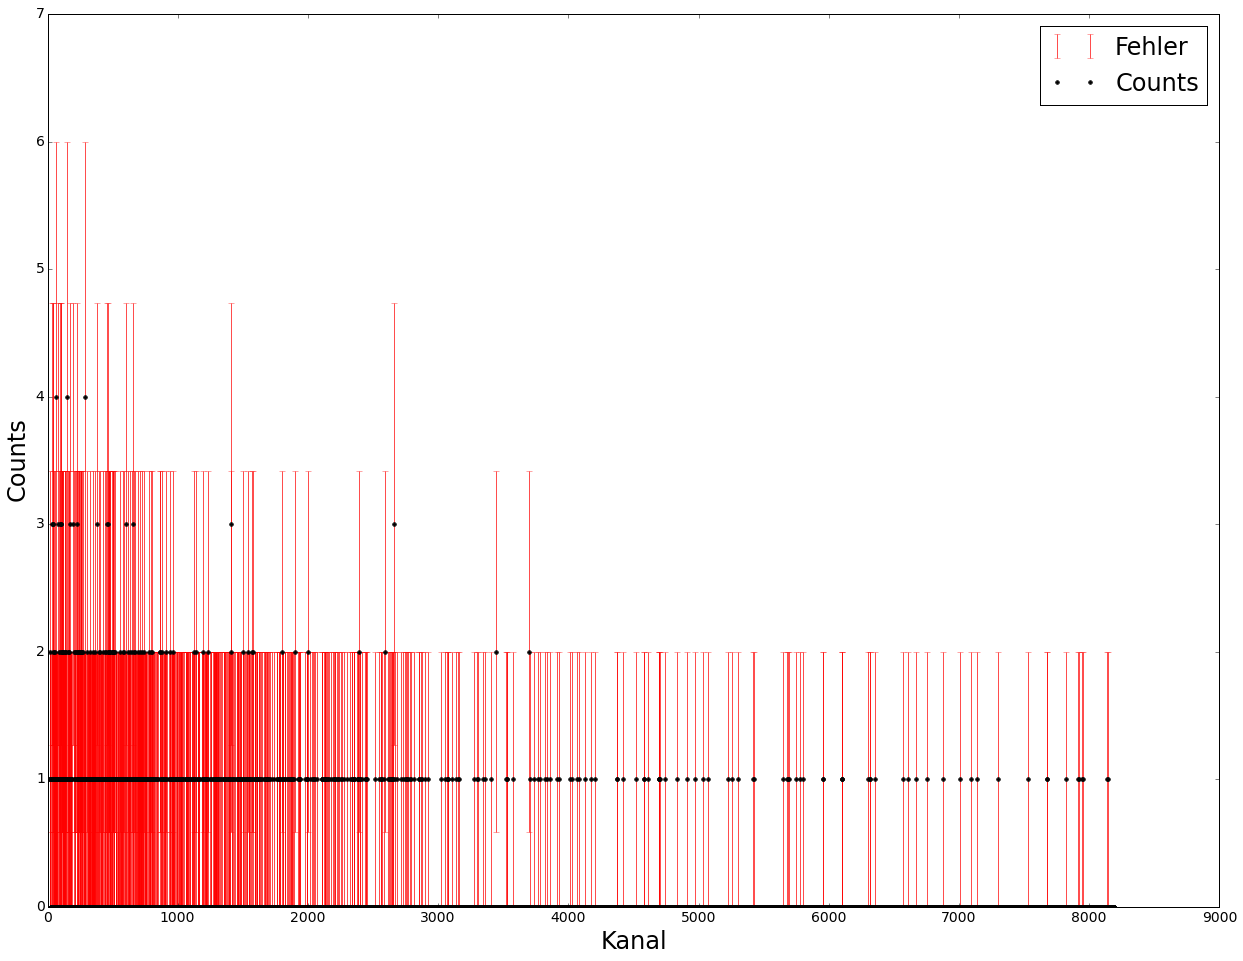

In [194]:
plt.errorbar(Kanal_Einträge_Fehler[0], Kanal_Einträge_Fehler[1], Kanal_Einträge_Fehler[2], fmt= ' r', alpha = 0.7 , label = 'Fehler')
plt.errorbar(Kanal_Einträge_Fehler[0], Kanal_Einträge_Fehler[1], fmt= '.' ,color = '0.01', label = 'Counts', markersize = 8)
plt.ylim(ymin = 0 , ymax = 7)
plt.ylabel('Counts', size = 24)
plt.xlabel('Kanal', size = 24)
plt.xticks( size = 14)
plt.yticks( size = 14)
plt.legend(loc = 'best', fontsize = 24)
plt.show()